# DNA RL: Crossover based optimization algorithm

Importing Libraries

In [1]:
import dna_env
import a2c
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt
from copy import deepcopy

Initializing Environment

In [15]:
sequence_length = 36
render = True
action_constraints = {'co_length': (10, 20), 
                      'opt_start_point': (0, 35), 
                      'co_start_point': (0, 35)}
early_stop_reward = {'reward_low_threshold': -1, 
                     'reward_high_threshold': .8, 
                     'patience': 200}
env = dna_env.DnaRLEnv(action_constraints, early_stop_reward, sequence_length=sequence_length)
env.reset()
train_session = None

In [16]:
seed = 23
state_dim = env.get_state_dim()
action_dim = env.get_action_dim()
print(f"state dim: {state_dim}")
print(f"action dim: {action_dim}")

state dim: (400,)
action dim: (3, 36)


Creating our agent

In [17]:
critic_init = {
    'seed': seed,
    'action_dim': action_dim[0],
    'network': {
        'i_size': state_dim[0],
        'l1_size': 200,
        'l2_size': 300,
        'l3_size': 104
               }
}
actor_init = {
    'entropy_learning_rate': 0.1,
    'seed': seed,
    'action_dim': action_dim[0],
    'network': {
        'i_size': state_dim[0], 
        'l1_size': 200,        
        'hidden_size': 150, 
        'o_size': sequence_length
               }
}
a2c_init = {
    'seed': seed,
    'discount_factor': .99, 
    'state_dim': state_dim, 
    'action_space': 3, 
    'actor': actor_init, 
    'critic': critic_init
}

In [18]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [19]:
agents_created = {
    'a2c_agent': a2c.A2C(a2c_init)
}
manual_agent_names = train_session.append_agents(agents_created)

In [20]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- a2c_agent


In [21]:
#train_session.load_model('a2c_agent', suffix='1')

In [23]:
n_episode = 3500
t_max_per_episode = 200
graphical = False

In [ ]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=manual_agent_names)

  0%|          | 12/3500 [00:58<4:41:26,  4.84s/it]

In [ ]:
train_session.plot_results(window=100, agent_subset=manual_agent_names)

In [ ]:
train_session.save_model(suffix='0629')

In [17]:
len(train_session.reward_per_time_step["a2c_agent"])

98621

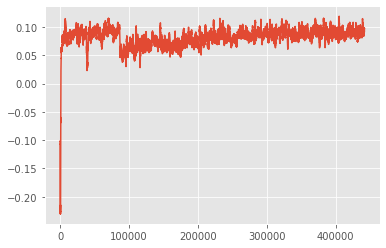

In [43]:
import numpy as np
series_mvg = utils.rolling_window(train_session.reward_per_time_step["a2c_agent"], window=1000)
series_mvg_avg = np.mean(series_mvg, axis=1)
plt.plot(range(len(series_mvg_avg)), series_mvg_avg)

In [37]:
train_session.agents["a2c_agent"].critic(torch.rand(1, 400).cuda())

tensor([[-0.0450]], device='cuda:0', grad_fn=<AddmmBackward>)

In [25]:
state = env.reset()

In [13]:
(1, ) + state.shape

(1, 400)

In [10]:
a = torch.tensor([11, 23,  3], device=v.device)

In [13]:
a.cpu().numpy()

array([11, 23,  3])

In [17]:
a.prod()

tensor(759, device='cuda:0')

In [10]:
import utils

In [16]:
utils.to_tensor([[float(3)]])


tensor([[3.]], device='cuda:0')

In [61]:
torch.save(train_session.agents["a2c_agent"].critic.state_dict(), "/home/benoit/Documents/work/RL_DNA/saved_model/a2c_agent_critic_1.pth")

In [62]:
torch.save(train_session.agents["a2c_agent"].actor.state_dict(), "/home/benoit/Documents/work/RL_DNA/saved_model/a2c_agent_actor_1.pth")